In [ ]:
def user():
    population = int(input('What is the approximate population size of your city/town? '))
    daily_rate = int(input('What was the daily increase of cases in your area? '))
    num_gen= int(input('The assumed generation time is 10 days, how many Generation do you want to go through: '))
    
    high_or_low = input('Would you like the R value to be a high or low estimate? ')
    if len(high_or_low)==3:
        low_estimate={'England':0.8, 'Northen Ireland':0.9, 'Scotland':0.8, 'Wales':0.8}
        country = input('What country in the UK is your town or city? ')
        B = low_estimate[country]
        return B, country, num_gen, daily_rate, population
    else:
        high_estimate={'England':1.0, 'Northen Ireland':1.1, 'Scotland':1.0, 'Wales':1.0}
        country = input('What country in the UK is your town or city? ')
        B = high_estimate[country]
        return B, country, num_gen, daily_rate, population

In [ ]:
user()

In [9]:
def calculations():
    B, country, num_gen, daily_rate, population = user()
    print('The R value for {} is {}. '.format(country, B))
    mr= 0.036
    T = 10
    recovery = .01
    R_nought = B/recovery
    first_infection = daily_rate - (daily_rate*mr)
    length= int(num_gen) + 1
    gen = range(1, length)
    all_cases = [daily_rate]
    total_immunity=[first_infection]
    total_death = [0]
    total_generation= [0]
    lisha_list = [first_infection]
    for t in gen:
        total_generation.append(t)
        R = sum(all_cases)
        if R>=population:
            remain = population-sum(all_cases)
            death= (remain)*0.036
            total_death.append(death)
            immunity = remain - death
            total_immunity.append(immunity)
            print('In generation final ({}) generation, the remaining individuals in the population received corona so there was {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, remain, 
                                                                                                                                                   daily_rate, immunity, death))
            print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity)))
            break
        else:
            I= daily_rate
            portion_infected= I/population
            S = population-R
            portion_suseptible = (population-R)/population
            rate_infection = B*portion_infected*portion_suseptible
            print('The infection rate in generation {} is {:f}'.format(t, rate_infection))
            new_cases = S*rate_infection
            all_cases.append(new_cases)
            death =  (new_cases)*0.036
            total_death.append(death)
            immunity = new_cases - death
            total_immunity.append(immunity) 
            print('In generation {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                               daily_rate, immunity, death))
            print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity))) 
            daily_rate = new_cases
            print(' ')
            lisha_list.append(sum(total_immunity))
    
    return all_cases, total_immunity, total_death, total_generation, lisha_list

In [8]:
def table():
    all_cases, total_immunity, total_death, total_generation, lisha_list = calculations()
    print(total_generation)
    import pandas as pd
    import numpy as np
    data = {
    'Number of Generations': total_generation,
    'Number of individuals with immunity': lisha_list
        }
    
    table = pd.DataFrame(data)
    print(table)
    numpy_array = table.to_numpy()
    print(' ')
    
    decide= input('Do you want to save the report to a file? Enter yes or no: ') #ask if they want to save a file
    if len(decide)==3: #If they input yes
        #currently only input that works is Gen
        print('Your file name will be "Gen"') #user needs to provide a file name
        
        how = input('How would you like your file to be opened? Enter append or write: ') #ask how they want the data to be saved
        confirm_how = input('Confirm editing format with yes or no: ') #ask for confirmation
        if len(confirm_how)==2:#if enter no
            how = input('How would you like your file to be opened? Enter append or write: ') #allowed to enter again
        if len(how)== 5: #write the following into the provided file
            file = open('Gen', 'w')
            np.savetxt('Gen' , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
        else: #append the following into the provided file
            file= open('Gen', 'a')
            np.savetxt('Gen' , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
                    
    else: #if the user doesn't want to save a file.
        print('Okay, the program is complete.')
    return print('Shamon')

In [10]:
def graph():
    import pandas as pd
    table()
    tdf= pd.read_csv("Gen",sep=" ")
    tdf.shape
    tdf=pd.read_csv("Gen",sep=" ",names=["Gen time", "Immunity"])
    tdf.head()
    tdf.plot(x="Gen time",y="Immunity")

What is the approximate population size of your city/town? 5000000
What was the daily increase of cases in your area? 692
The assumed generation time is 10 days, how many Generation do you want to go through: 30
Would you like the R value to be a high or low estimate? high
What country in the UK is your town or city? Scotland
The R value for Scotland is 1.0. 
The infection rate in generation 1 is 0.000138
In generation 1, there were 692 cases, after an increase of 692. 667 people became immune, and 25 died.
After 1 generation(s) of COVID, 1334 number of people will be immune.
 
The infection rate in generation 2 is 0.000138
In generation 2, there were 691 cases, after an increase of 692. 667 people became immune, and 25 died.
After 2 generation(s) of COVID, 2001 number of people will be immune.
 
The infection rate in generation 3 is 0.000138
In generation 3, there were 691 cases, after an increase of 691. 666 people became immune, and 25 died.
After 3 generation(s) of COVID, 2667 numb

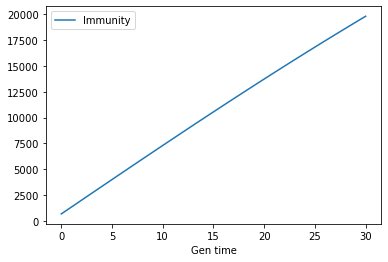

In [11]:
graph()

In [ ]:
#vaccine : Same code + add to recovered how many people being vacced per day 
effectiveness > amount vacced * 0.% 

To do: vac shite - ana
    change to percentage immunity - lish 
    user interaction - moi 
    report/comments - ellie
    
    change to spyder at the end 
    
    e z we got this 
    itll be grand 
    
    